<a href="https://colab.research.google.com/github/Liso15/Projects/blob/main/Electric_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
pwd = os.getcwd()

In [ ]:
from ast import parse


data = pd.read_csv(pwd + "/Electric_Production.csv", index_col="DATE", parse_dates=True)

In [ ]:
# the top of our data
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
# the last bottom of our data
data.tail()

,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [ ]:
# the last bottom of our data
data.tail()

,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib
matplotlib.rc("figure",figsize = (20,10))
# modification configuration, using the rc method.

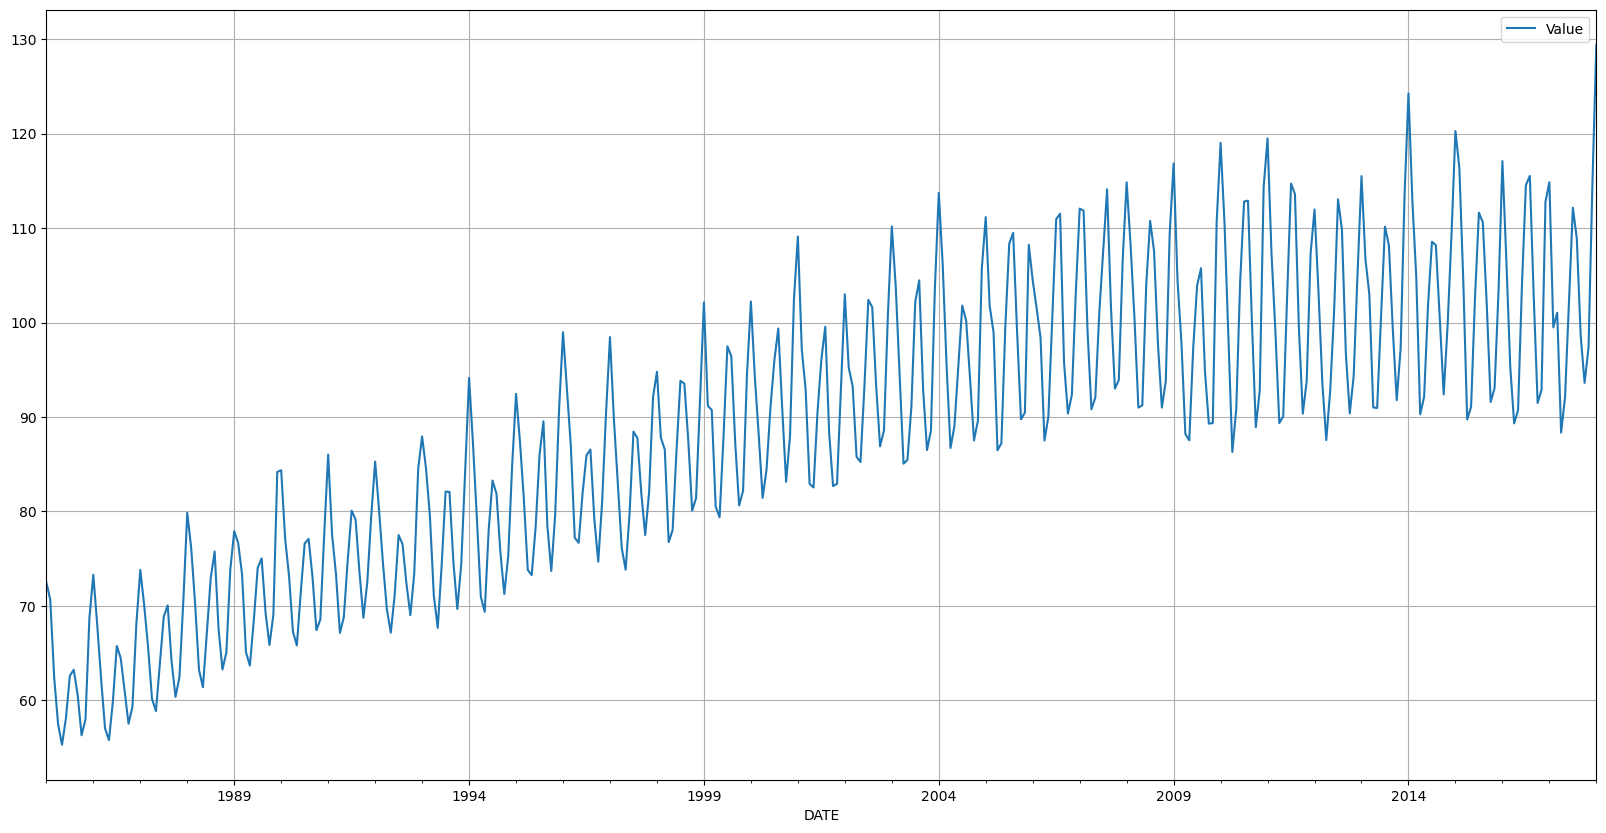

In [ ]:
# making our data visual
import matplotlib.pyplot as plt
data.plot(grid='k')
plt.show()

In [ ]:
# restructing data according to these dates below:

start_date = "1985-01-01"
end_date = "2010-01-01"
mask = (data.index >= start_date) & (data.index <= end_date)
data = data.loc[mask]

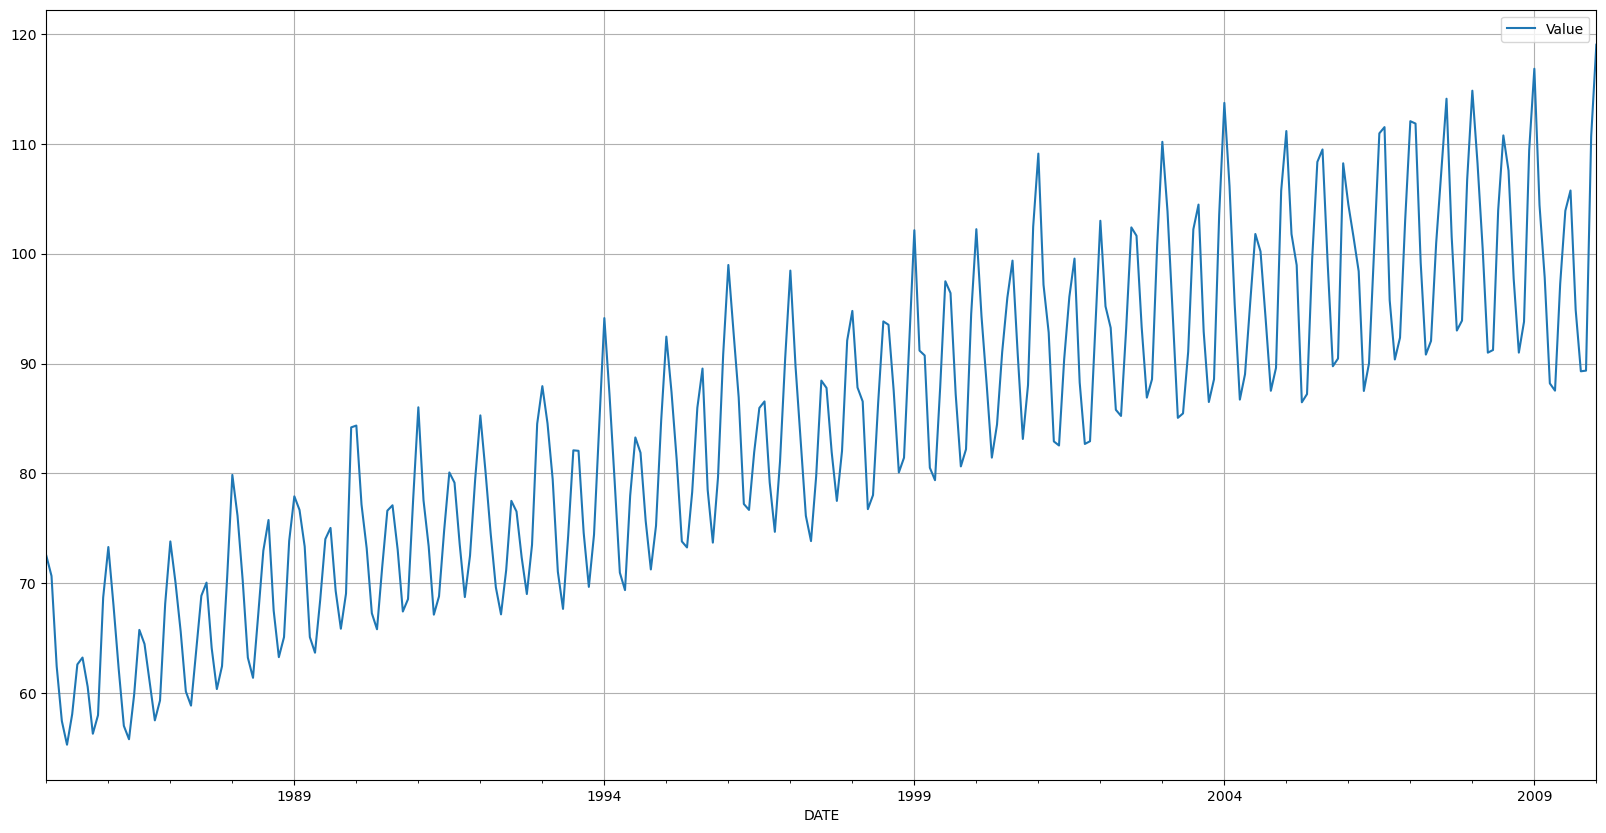

In [ ]:
# show visiual


data.plot(grid='k')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

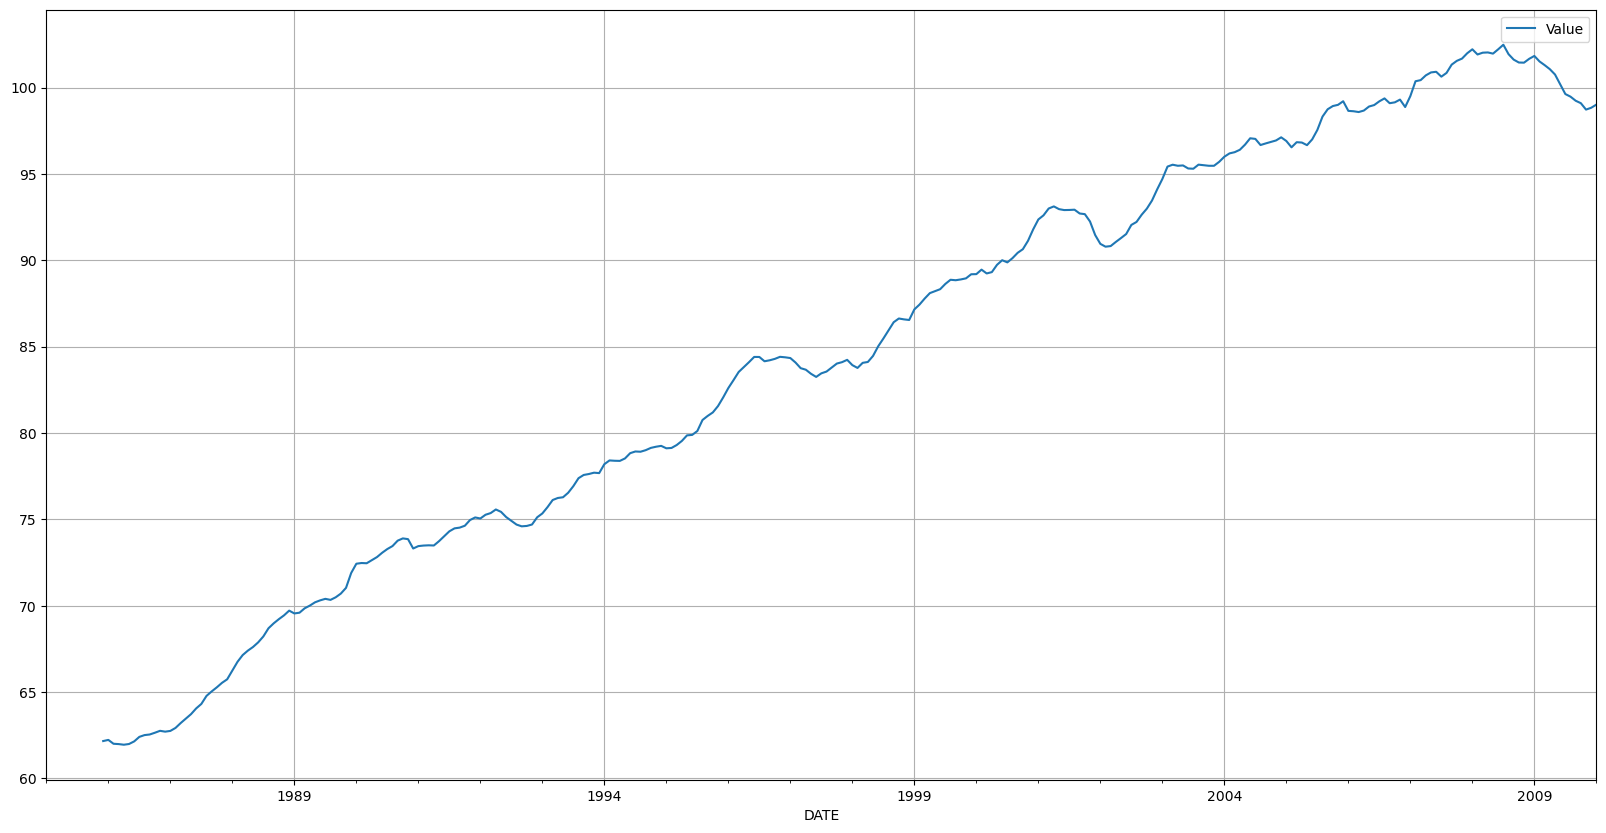

In [ ]:
# using . rolling = method and window=12 for 12 months averge and a visiual
yearlydata = data.rolling(window=12).mean()
yearlydata.plot(grid= 'k')
plt.show

In [ ]:
xcoords = ["1986-01-01", "1987-01-01","1988-01-01","1989-01-01","1990-01-01","1991-01-01","1992-01-01","1993-01-01","1994-01-01","1995-01-01","1996-01-01","1997-01-01","1998-01-01","1999-01-01","2000-01-01","2000-01-01","2001-01-01","2002-01-01","2003-01-01","2004-01-01","2005-01-01","2006-01-01","2007-01-01","2008-01-01","2009-01-01"]

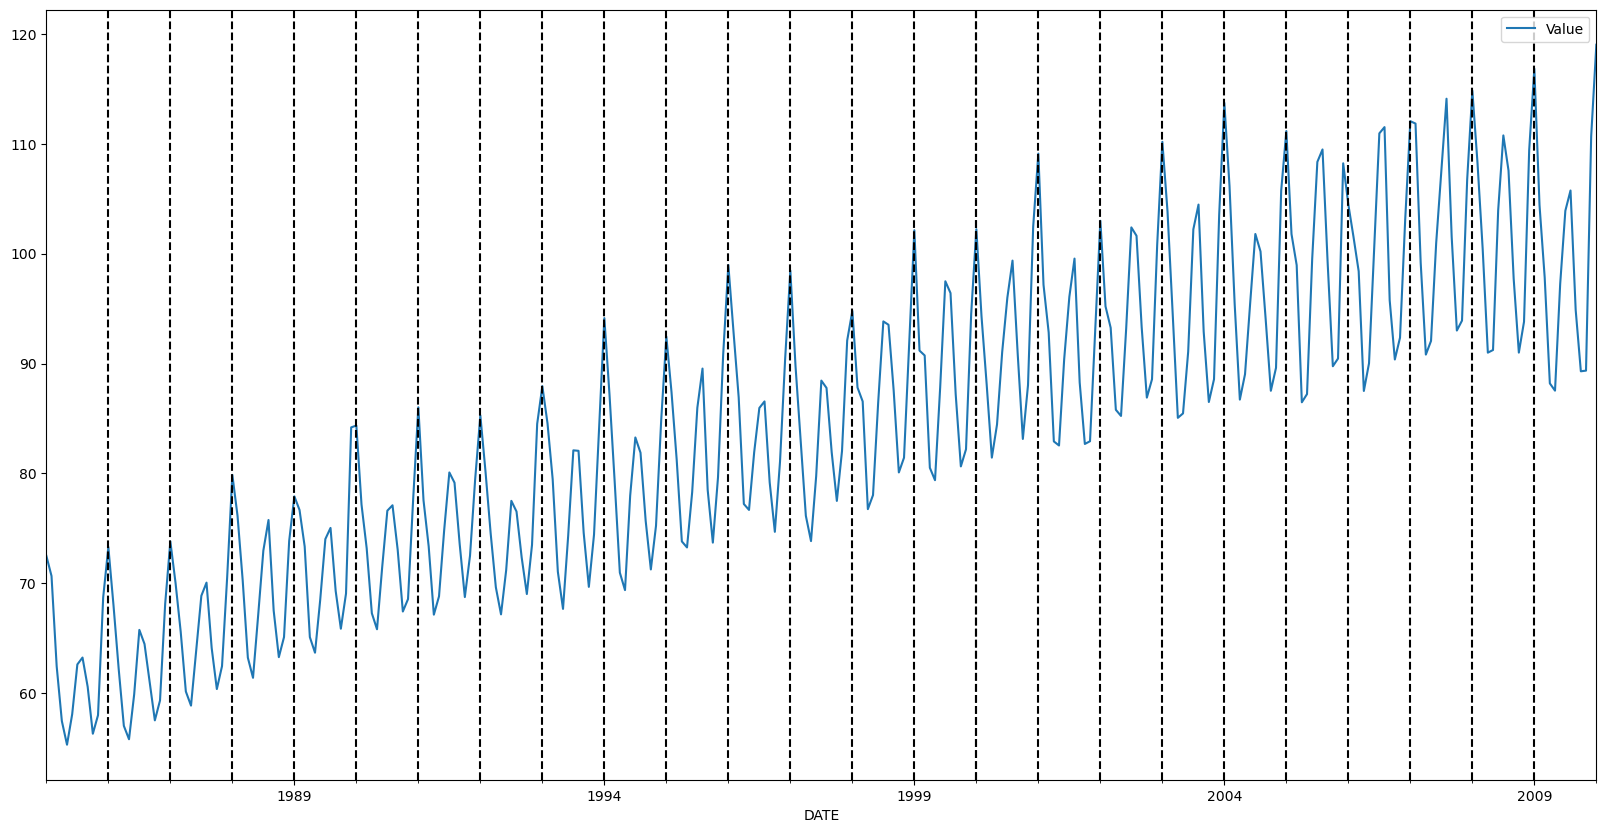

In [ ]:

data.plot()
for xc in xcoords:
    plt.axvline(x=xc, color='k', linestyle= "--")
plt.show()

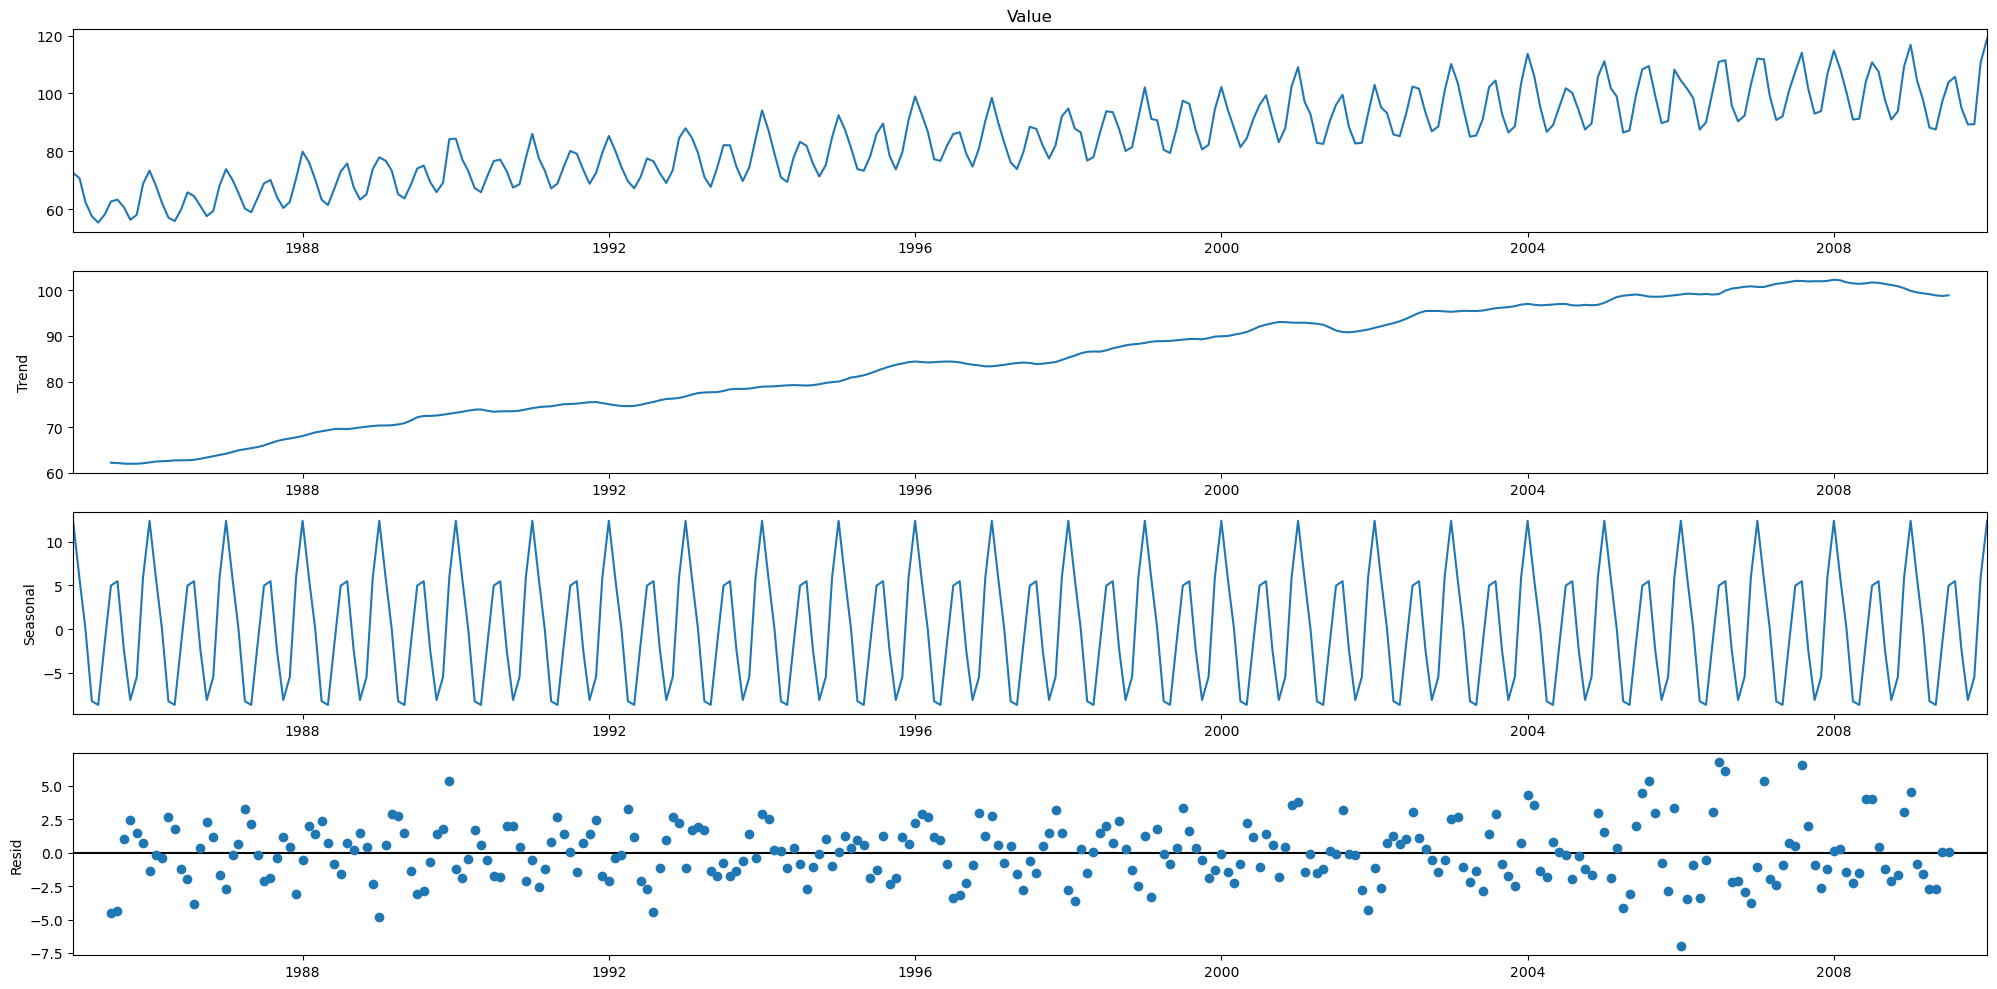

In [ ]:
# seasonal decomposition

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data["Value"],model="additive")
decompose.plot()
plt.show()

In [ ]:
# test for stationarity in our dataset
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller((series),autolag= "AIC")
    labels =["ADF Test Statistic","p value", "# lags", "observations"]
    out = pd.Series(result[0:4],index=labels)
    print(out.to_string)

    if result [1] <= 0.05:
     print("Reject the null hypothesis")
     print("Data has no unit root and stationary")
    else:
        print("Fail to reject null hypthesis")
        print("Data has unit root and non-stationary")



In [ ]:
adf_test(data["Value"])

<bound method Series.to_string of ADF Test Statistic     -1.967267
p value                 0.301107
# lags                 15.000000
observations          285.000000
dtype: float64>
Fail to reject null hypthesis
Data has unit root and non-stationary


In [ ]:
# model


from statsmodels.tsa.ar_model import AutoReg
aic_score = []
for index in range(1,30):
    model = AutoReg(data["Value"], lags= index )
    model_fitted = model.fit()
    aic_score.append(model_fitted)

c:\Users\Liso\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Liso\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Liso\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Liso\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Liso\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [ ]:



aic_score.min(aic_score)

AttributeError: 'list' object has no attribute 'min'

In [ ]:
aic_score[23]

In [ ]:
model = AutoReg(data["Value"], lags= 24)
model_fitted = model.fit()
print(model_fitted.summary())

c:\Users\Liso\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  301
Model:                    AutoReg(24)   Log Likelihood                -619.072
Method:               Conditional MLE   S.D. of innovations              2.261
Date:                Wed, 29 Mar 2023   AIC                           1290.145
Time:                        15:46:43   BIC                           1384.369
Sample:                    01-01-1987   HQIC                          1327.951
                         - 01-01-2010                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1777      1.135      3.682      0.000       1.954       6.401
Value.L1       0.5436      0.059      9.233      0.000       0.428       0.659
Value.L2      -0.1055      0.068     -1.562      0.1

In [ ]:
fcast = model_fitted.predict(start = len(data),end = len(data) + 24)

c:\Users\Liso\miniconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


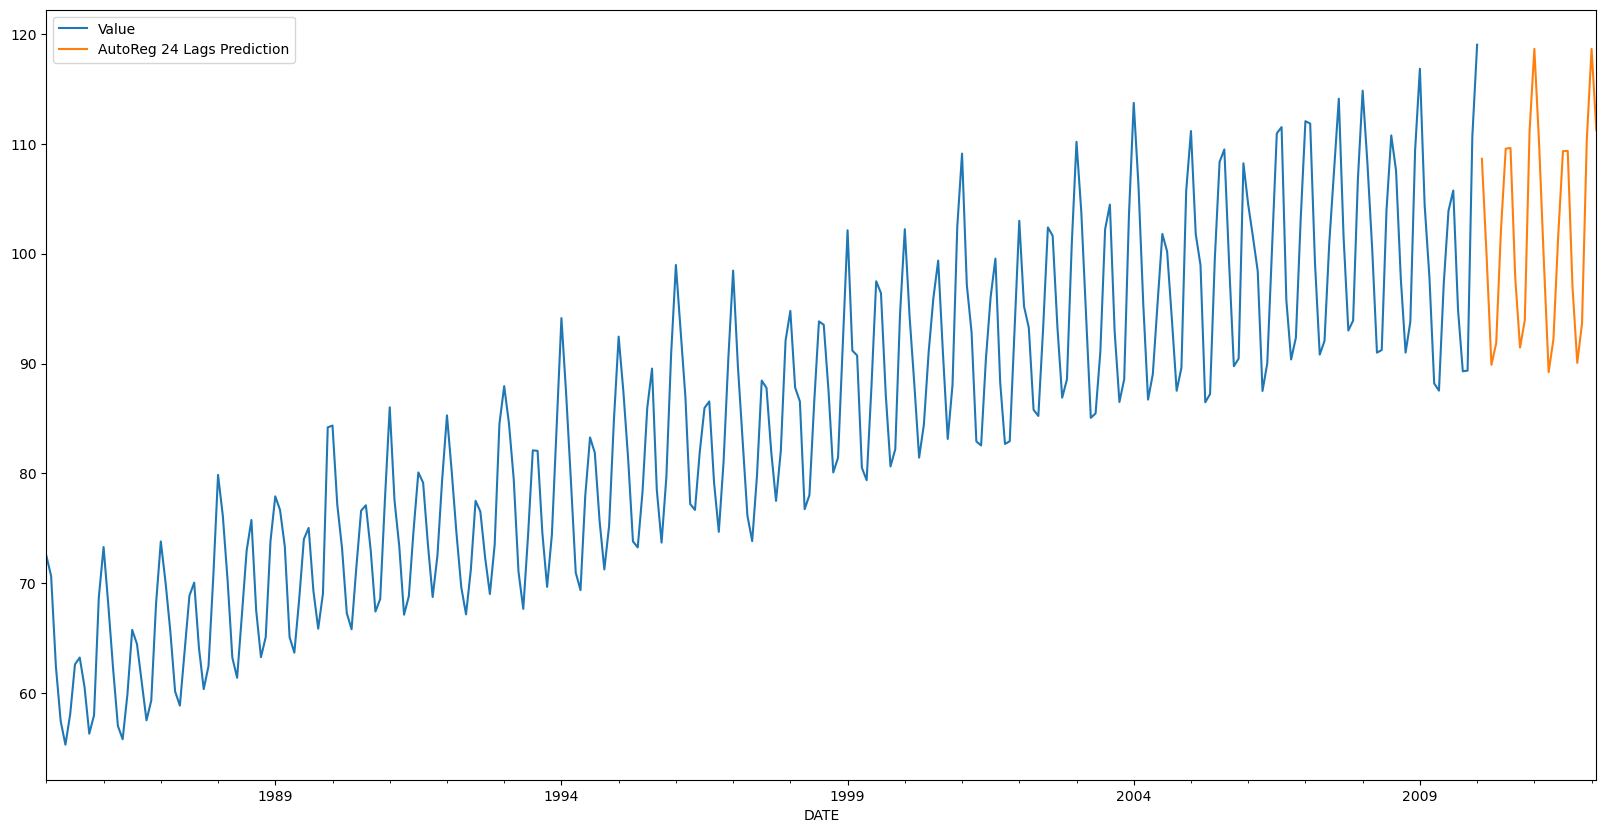

In [ ]:
fcast = fcast.rename("AutoReg 24 Lags Prediction")
data.plot(legend=True)
fcast.plot(legend=True)
plt.show()


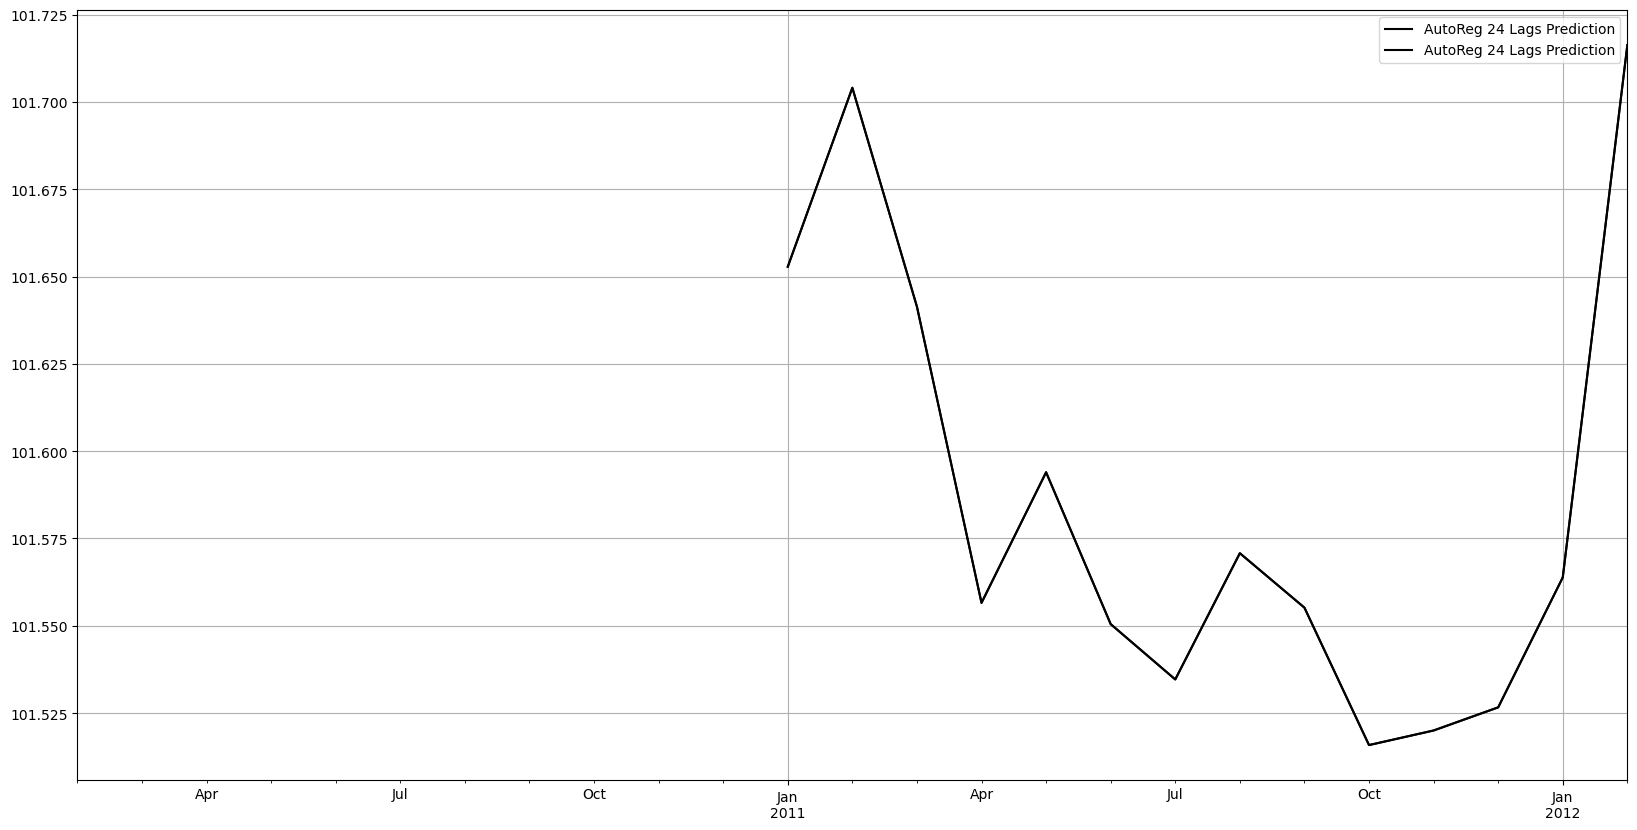

In [ ]:
avg = data.rolling(window=12).mean()
avg = fcast.rolling(window=12).mean()
avg.plot(legend=True, color= 'k', grid= 'k')
avg.plot(legend=True, color= 'k', grid= 'k')
plt.show()

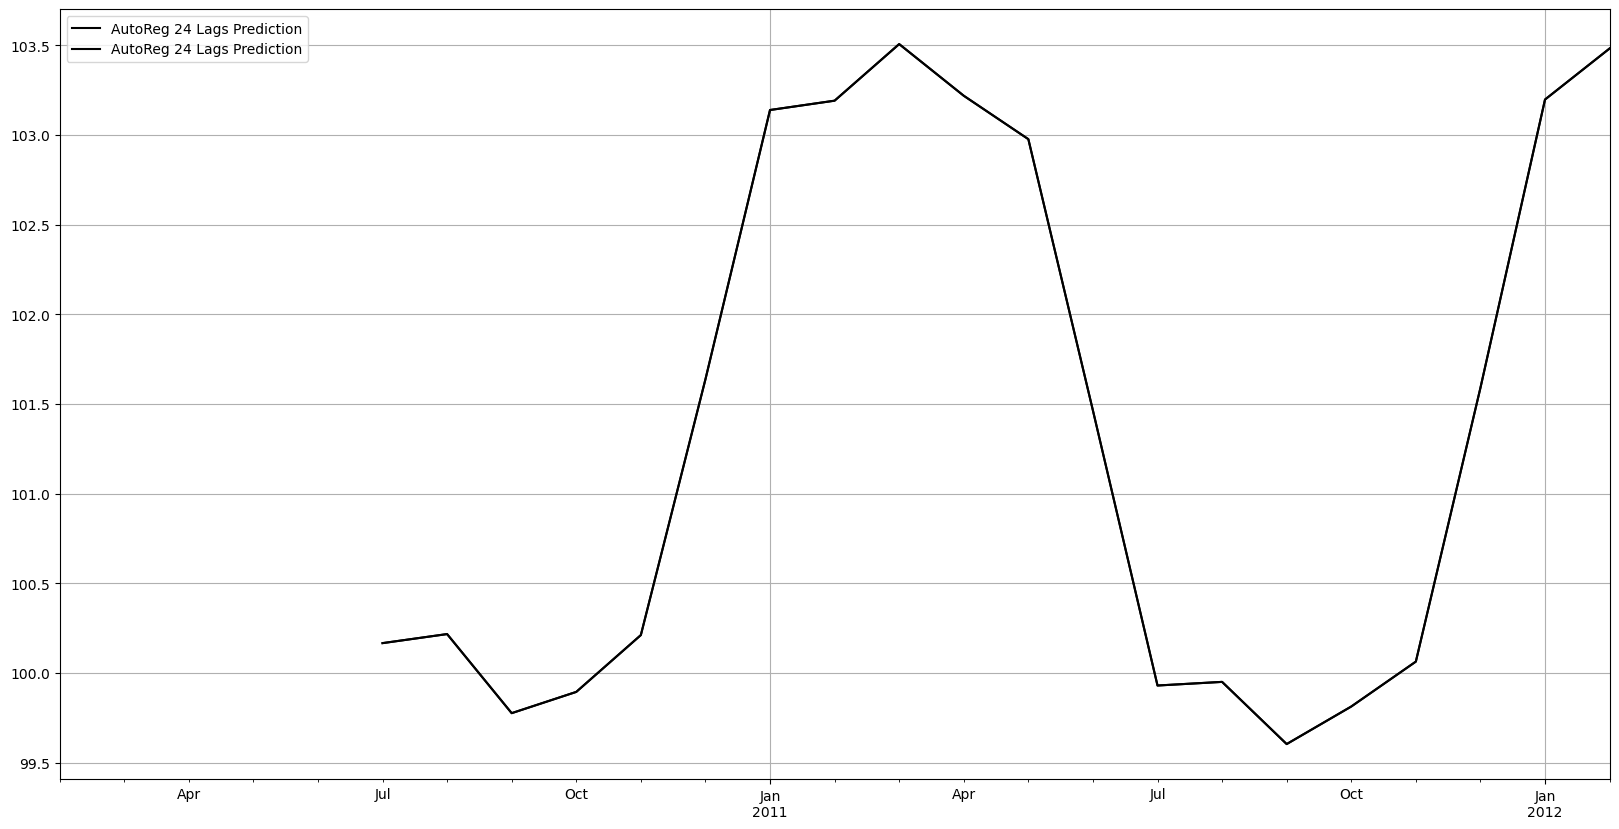

In [ ]:
avg = data.rolling(window=6).mean()
avg = fcast.rolling(window=6).mean()
avg.plot(legend=True, color= 'k', grid= 'k')
avg.plot(legend=True, color= 'k', grid= 'k')
plt.show()

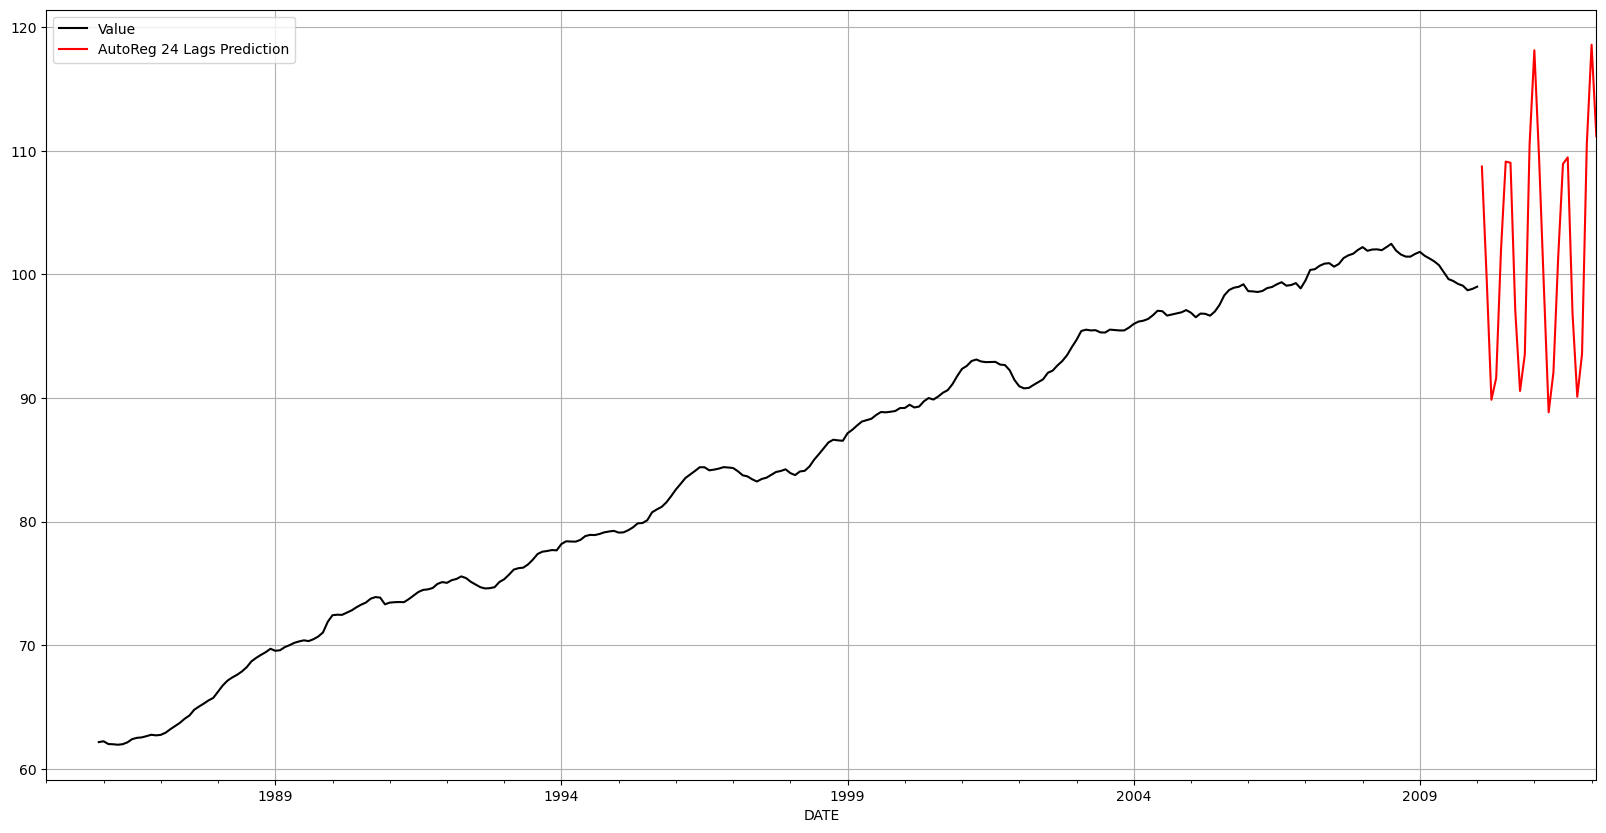

In [ ]:
yearlydata = data.rolling(window=12).mean()
yearlydata.plot(legend=True, color='k' , grid='k')
fcast.plot(legend=True, color= 'r', grid='k')
plt.show()

In [ ]:
data.to_csv('Electric_project', index=False)